<a href="https://colab.research.google.com/github/blackJJW/ML/blob/main/self_study_ML/chapter2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book : '혼자 공부하는 머신러닝 + 딥러닝', 박해선 지음, 한빛미디어

# 02-1 훈련 세트와 테스트 세트

## 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)
- 지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요
- 지도 학습에서는 데이터와 정답을 입력(input)과 타깃(target), 이 둘을 합쳐 훈련 데이터(training data)
- 입력과 타깃 : 독립변수(입력), 종속변수(타깃)
- 지도 학습 알고리즘은 입력(데이터)과 타깃(정답)으로 이뤄진 훈련 데이터가 필요


- 입력 데이터만 있을 때는 비지도 학습 알고리즘을 사용

- 강화 학습(reinforcement learning) : 타깃이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습

## 훈련 세트와 테스트 세트
- 훈련에 사용되는 데이터를 훈련 세트(train set)
- 평가에 사용되는 데이터를 테스트 세트(test set)
- 머신러닝의 정확한 평가를 위해서는 데스트 세트와 훈련 세트가 따로 준비되어야 함

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

- 이 때 하나의 생선 데이터를 샘플(sample)이라고 부름
- 훈련 세트 35개, 테스트 세트 14개

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

- 일반적으로 리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 인덱스(index)를 지정
- ex) fish_data의 다섯 번째 샘플을 출력하기 위해 다음과 같이 쓸 수 있음

In [6]:
print(fish_data[4])

[29.0, 430.0]


- 파이썬 리스트는 인덱스 외에도 슬라이싱(slicing) 제공
- 슬라이싱 연산을 이용하면 인덱스의 범위를 지정하여 원소를 여러 개 선택 가능
- 슬라이싱을 사용할 때는 마지막 인덱스의 원소는 포함되지 않는다.

In [7]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [9]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [10]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [17]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

## 샘플링 편향
- 일반적으로 훈려 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향(sampling bias)라고 부름
- 특정 종휴릐 샘플이 과도하게 많은 샘플링 편향을 가지고 있다면 제대로 된 지도 학습 모델을 만들 수 없다.

## 넘파이
- 배열(array) 라이브러리
- 고차원의 배열을 손쉽게 만들고 조작할 수 잇는 간편한 도구를 제공

> 차원(dimension)
  - 배열에서 차원은 좌표계의 축과 같음
  - 1차원 배열은 선, 2차원 배열은 면, 3차원 배열은 공간

In [18]:
import numpy as np

In [19]:
# 파이썬 리스를 넘파이 배열로 바꾸기
# 넘파이 array() 함수에 파이썬 리스트를 전달

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [21]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [22]:
print(input_arr.shape) # (샘플 수, 특성 수)

(49, 2)


- 이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만듬
- 배열을 섞은 후 나누는 방식 대신에 무작위로 샘플을 고르는 방법 사용
- 한 가지 주의, input_arr와 target_arr에서 같은 위치는 함께 선택되어야 함
- 훈련 세트와 테스트 세트로 나눌 인덱스 값이 필요
- 넘파이 arange() 함수를 사용하면 0에서 48까지 1씩 증가하는 인덱스를 간단히 만들수 있음
- 일정한 결과를 얻으려면 초기에 램덤시드(random seed)를 지정

In [24]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

- 넘파이 arange() 함수에 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열을 만듬

In [25]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


- 넘파이는 배열 인덱싱(array indexing) 제공
- 배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 버네 여러 개의 원소를 선택 가능

In [26]:
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


- 리스트 대신 넘파이 배영을 인덱스로 전달 가능

In [27]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [28]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [29]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

- 2차원 배열은 행과 열 인덱스를 콤마(,)로 나누어 지정
- 슬라이싱 연산자로 처음부터 마지막 원소까지 모두 선택하는 경우 시작과 종료 인덱스를 모두 생략 가능

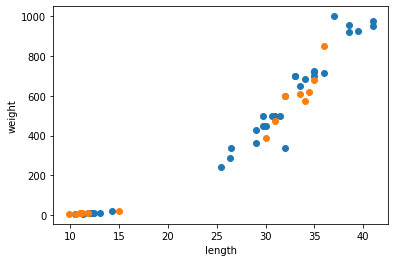

In [30]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램
- k-최근접 이웃 모델을 훈련
- fit() 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버림
- 새로운 객체 생성 필요

In [31]:
kn = kn.fit(train_input, train_target)

In [32]:
kn.score(test_input, test_target)

1.0

In [33]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [34]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- 사이킷런 모델의 입력과 출력은 모두 넘파이 배열

## 훈련 모델 평가
- 모델을 훈련할 때 사용한 데이터로 모델의 성능을 평가하는 것은 정답을 미리 알려주고 시험을 보는 것과 같음
- 공정하게 점수를 매개개 위해서는 훈련에 참여하지 않는 샘플을 사용해야함
- 이 때문에 훈련 데이터를 훈련 세트와 테스트 세트로 나누었다.

## 마무리

### 키워드로 끝내는 핵심 포인트
- 지도 학습 : 입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는 게 활용
- 비지도 학습 : 타깃 데이터가 없음. 따라서 무엇을 예측하는 것이 아니라 입력 데이터에서 어떤 특징을 찾는 데 활용
- 훈련 세트 : 모델을 훈련할 때 사용하는 데이터. 보통 훈련 세트가 클수로 좋음. 따라서 테스트 세트를 제외한 모든 데이터를 사용
- 테스트 세트 : 전체 데이터에서 20~30%를 테스트 세트로 사용하느 경우가 많음. 전체 데이터가 아주 크다면 1%만 덜어내도 충분

### 핵심 패키지와 함수
> numpy
  - seed() : 넘파이엥서 난수를 생성하기 위한 정수 초깃값을 지정. 초깃값이 같으면 동일한 난수를 뽑을 수 있다. 따라서 랜덤 함수의 결과를 동일하게 재현하고 싶을 때 사용
  - arange() : 일정한 간격의 정수또는 실수 배열을 생성. 기본 간격은 1. 매개변수가 하나면 종료 숫자를 의미. 0에서 종료 숫자까지 배열을 생성. 종료 숫자는 배열에 포함 안됨

In [35]:
print(np.arange(3))

[0 1 2]


In [36]:
print(np.arange(1, 3))

[1 2]


In [37]:
print(np.arange(1, 3, 0.2))

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


> - shuffle() : 주어진 배열을 랜덤하게 섞음. 다차원 배열일 경우 첫 번째 축(행)에 대해서만 섞음

In [39]:
arr = np.array([[1,2], [3, 4], [5, 6]])
np.random.shuffle(arr)
print(arr)

[[5 6]
 [1 2]
 [3 4]]
